In [44]:
import numpy as np
import pandas as pd


In [45]:
df=pd.read_excel("/Users/parthgulati/Desktop/DS_Portfolio_mgmt.xlsx")


In [46]:
df.info()
df=df.drop('Date', axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1231 non-null   datetime64[ns]
 1   reliance               1231 non-null   float64       
 2   hdfc bannk             1231 non-null   float64       
 3   infosys                1231 non-null   float64       
 4   tcs                    1231 non-null   float64       
 5   icici                  1231 non-null   float64       
 6   hindunilever           1231 non-null   float64       
 7   airtel                 1231 non-null   float64       
 8   asian paints           1231 non-null   float64       
 9   mahindra and mahindra  1231 non-null   float64       
 10  L&T                    1231 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 105.9 KB


In [60]:
returns = df.pct_change().dropna()

print("\n--- Daily Returns Calculated ---")
print("First 5 rows of daily returns:")
print(returns.head())



--- Daily Returns Calculated ---
First 5 rows of daily returns:
   reliance  hdfc bannk   infosys       tcs     icici  hindunilever    airtel  \
1 -0.003040    0.000170 -0.011643 -0.025509  0.023129     -0.020895 -0.012699   
2 -0.007065   -0.024377 -0.018979 -0.012059 -0.037978     -0.000633 -0.020593   
3 -0.037331    0.021319 -0.010674  0.026198  0.003029     -0.004928  0.032354   
4  0.026954   -0.006455  0.005394  0.011314 -0.024885      0.004316 -0.013353   
5  0.006849    0.031263  0.031522  0.043603  0.021249      0.013126 -0.006276   

   asian paints  mahindra and mahindra       L&T  
1      0.003703               0.107493  0.062217  
2     -0.015507              -0.002621 -0.012106  
3      0.002244               0.016622 -0.001719  
4      0.009093              -0.014184 -0.005696  
5      0.009903               0.033879  0.008571  


In [48]:
 returns

,reliance,hdfc bannk,infosys,tcs,icici,hindunilever,airtel,asian paints,mahindra and mahindra,L&T
1,-0.003040,0.000170,-0.011643,-0.025509,0.023129,-0.020895,-0.012699,0.003703,0.107493,0.062217
2,-0.007065,-0.024377,-0.018979,-0.012059,-0.037978,-0.000633,-0.020593,-0.015507,-0.002621,-0.012106
3,-0.037331,0.021319,-0.010674,0.026198,0.003029,-0.004928,0.032354,0.002244,0.016622,-0.001719
4,0.026954,-0.006455,0.005394,0.011314,-0.024885,0.004316,-0.013353,0.009093,-0.014184,-0.005696
5,0.006849,0.031263,0.031522,0.043603,0.021249,0.013126,-0.006276,0.009903,0.033879,0.008571
...,...,...,...,...,...,...,...,...,...,...
1226,-0.012098,0.002240,0.021354,0.009251,0.003723,-0.009031,0.009294,0.014003,-0.007127,0.009272
1227,0.007645,0.007313,0.019116,-0.018333,0.007641,-0.002154,0.011140,0.002566,0.023254,0.009315
1228,0.002753,-0.002218,-0.028136,0.008489,0.000442,0.007763,0.015424,0.042375,0.001387,-0.000101
1229,0.012120,-0.002880,0.012063,-0.024691,0.019869,-0.001236,0.008680,0.039570,-0.014597,0.012112


In [62]:


TRADING_DAYS_PER_YEAR = 252


mean_returns = returns.mean() * TRADING_DAYS_PER_YEAR


cov_matrix = returns.cov() * TRADING_DAYS_PER_YEAR


stock_names = df.columns.tolist()
num_assets = len(stock_names)


RISK_FREE_RATE = 0.07  # Assuming 7% as an example

print("\nKey Annualized Statistics Calculated")
print("\nAnnualized Mean Returns (as decimals):")
print(mean_returns)
print("\nAnnualized Covariance Matrix (first 5x5 block):")
print(cov_matrix.iloc[:5, :5]) 


Key Annualized Statistics Calculated

Annualized Mean Returns (as decimals):
reliance                 0.112077
hdfc bannk               0.092973
infosys                  0.047616
tcs                      0.086090
icici                    0.237876
hindunilever             0.041104
airtel                   0.330961
asian paints             0.084566
mahindra and mahindra    0.403417
L&T                      0.298737
dtype: float64

Annualized Covariance Matrix (first 5x5 block):
            reliance  hdfc bannk   infosys       tcs     icici
reliance    0.053685    0.007975  0.003909  0.000012  0.009190
hdfc bannk  0.007975    0.046572 -0.002273  0.002079  0.025511
infosys     0.003909   -0.002273  0.068950  0.003948  0.000339
tcs         0.000012    0.002079  0.003948  0.186920  0.000726
icici       0.009190    0.025511  0.000339  0.000726  0.050739


In [63]:
returns.corr()

,reliance,hdfc bannk,infosys,tcs,icici,hindunilever,airtel,asian paints,mahindra and mahindra,L&T
reliance,1.000000,0.159498,0.064243,0.000124,0.176082,0.183080,0.107629,0.143045,0.322263,0.159271
hdfc bannk,0.159498,1.000000,-0.040120,0.022286,0.524793,0.121940,0.289572,0.222681,0.195254,0.391292
infosys,0.064243,-0.040120,1.000000,0.034777,0.005737,0.049929,-0.043513,0.023895,0.036366,-0.013349
tcs,0.000124,0.022286,0.034777,1.000000,0.007451,-0.047669,0.034541,-0.030008,0.001678,0.030660
icici,0.176082,0.524793,0.005737,0.007451,1.000000,0.136882,0.343828,0.229959,0.226443,0.433227
hindunilever,0.183080,0.121940,0.049929,-0.047669,0.136882,1.000000,0.070048,0.258508,0.186294,0.101529
airtel,0.107629,0.289572,-0.043513,0.034541,0.343828,0.070048,1.000000,0.189527,0.124404,0.307426
asian paints,0.143045,0.222681,0.023895,-0.030008,0.229959,0.258508,0.189527,1.000000,0.135776,0.264885
mahindra and mahindra,0.322263,0.195254,0.036366,0.001678,0.226443,0.186294,0.124404,0.135776,1.000000,0.198426
L&T,0.159271,0.391292,-0.013349,0.030660,0.433227,0.101529,0.307426,0.264885,0.198426,1.000000


In [66]:
from scipy.optimize import minimize

def get_portfolio_stats(weights, mean_returns, cov_matrix, risk_free_rate):   

    # Portfolio return: Sum of (weight * individual asset's mean return)
    portfolio_return = np.sum(weights * mean_returns)
    
   
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    

    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    
    return portfolio_return, portfolio_volatility, sharpe_ratio

In [70]:
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    """
    Objective function for the optimizer.
    We want to MAXIMIZE the Sharpe Ratio, so we MINIMIZE its negative.
    """
    # Only need the Sharpe Ratio from get_portfolio_stats (the third element)
    return -get_portfolio_stats(weights, mean_returns, cov_matrix, risk_free_rate)[2]


In [71]:

constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})


bounds = tuple((0, 1) for _ in range(num_assets))

# Initial Guess: Start the optimization with an equal allocation to all assets
initial_weights = np.array([1 / num_assets] * num_assets)

print(f"Number of assets: {num_assets}")
print(f"Initial equal weights guess: {initial_weights}")

Number of assets: 10
Initial equal weights guess: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [72]:



opt_result = minimize(
    negative_sharpe_ratio,     # The function to minimize (negative Sharpe)
    initial_weights,           # Starting point for the optimization
    args=(mean_returns, cov_matrix, RISK_FREE_RATE), # Arguments to pass to objective function
    method='SLSQP',            # Optimization algorithm
    bounds=bounds,             # Bounds for each weight (0 to 1)
    constraints=constraints    # Constraint that weights sum to 1
)

if opt_result.success:
    # Extract the optimal weights from the optimization result
    optimal_weights = opt_result.x
    
    # Calculate the performance metrics for this optimal portfolio
    opt_return, opt_volatility, opt_sharpe = get_portfolio_stats(
        optimal_weights, mean_returns, cov_matrix, RISK_FREE_RATE
    )

    print("\n--- Optimal Portfolio Allocation (Maximizing Sharpe Ratio) ---")
    print("\nOptimal Weights (as percentages):")
    
    # Create a sorted list of (stock name, optimal weight) tuples
    # This helps in quickly seeing the most significant allocations
    sorted_weights = sorted(zip(stock_names, optimal_weights), key=lambda x: x[1], reverse=True)
    
    for stock, weight in sorted_weights:
        # Format weights to 2 decimal places as a percentage
        # np.round is used to handle tiny floating point values that might appear as -0.0000%
        print(f"  {stock}: {np.round(weight * 100, 4):.2f}%")

    print("\n--- Expected Optimal Portfolio Performance (Annualized) ---")
    print(f"  Expected Return:     {opt_return*100:.2f}%")
    print(f"  Expected Volatility (Risk): {opt_volatility*100:.2f}%")
    print(f"  Optimal Sharpe Ratio:    {opt_sharpe:.4f}")

else:
    print("\nOptimization failed. Details:")
    print(opt_result.message) # Print the reason for failure


--- Optimal Portfolio Allocation (Maximizing Sharpe Ratio) ---

Optimal Weights (as percentages):
  airtel: 41.75%
  mahindra and mahindra: 35.25%
  L&T: 21.10%
  icici: 1.91%
  infosys: 0.00%
  hindunilever: 0.00%
  tcs: 0.00%
  reliance: 0.00%
  asian paints: 0.00%
  hdfc bannk: 0.00%

--- Expected Optimal Portfolio Performance (Annualized) ---
  Expected Return:     34.79%
  Expected Volatility (Risk): 17.62%
  Optimal Sharpe Ratio:    1.5776



--- Generating Efficient Frontier Plot via Monte Carlo Simulation ---
Monte Carlo simulation of 50000 portfolios complete.
Efficient Frontier plot saved as 'efficient_frontier_plot.png' in /Users/parthgulati/Desktop/DS portfolio mgmt


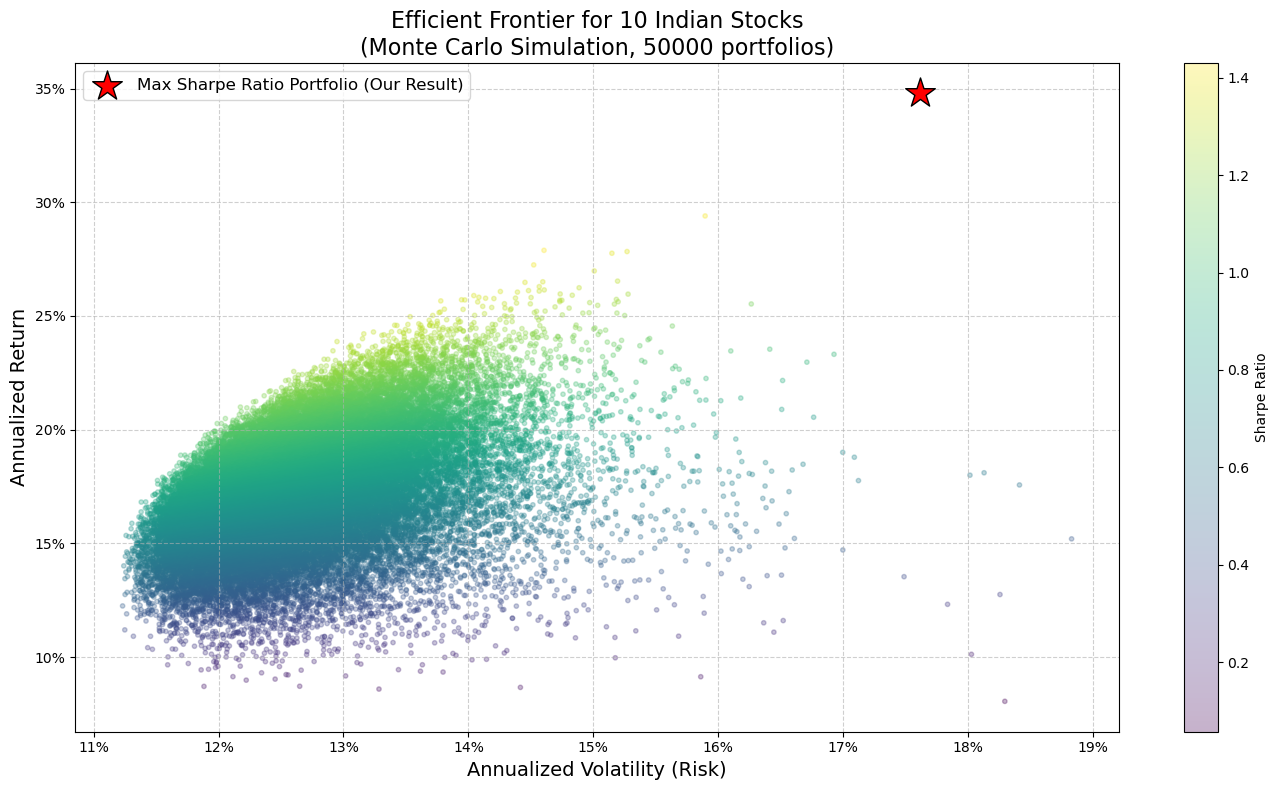

In [74]:
import matplotlib.pyplot as plt

print("\n--- Generating Efficient Frontier Plot via Monte Carlo Simulation ---")

# Number of random portfolios to simulate
num_portfolios = 50000

# Arrays to store the results of each simulated portfolio
all_portfolio_returns = np.zeros(num_portfolios)
all_portfolio_volatilities = np.zeros(num_portfolios)
all_portfolio_sharpes = np.zeros(num_portfolios)

for i in range(num_portfolios):
    # 1. Generate random weights for all assets
    rand_weights = np.random.rand(num_assets)
    # 2. Normalize the random weights so they sum to 1
    rand_weights = rand_weights / np.sum(rand_weights)
    
    # 3. Calculate portfolio statistics for these random weights
    port_ret, port_vol, port_sharpe = get_portfolio_stats(
        rand_weights, mean_returns, cov_matrix, RISK_FREE_RATE
    )
    
    # 4. Store the calculated statistics
    all_portfolio_returns[i] = port_ret
    all_portfolio_volatilities[i] = port_vol
    all_portfolio_sharpes[i] = port_sharpe

print(f"Monte Carlo simulation of {num_portfolios} portfolios complete.")

# --- Plotting the Efficient Frontier ---
plt.figure(figsize=(14, 8)) # Set a larger figure size for better readability

# Scatter plot of all randomly generated portfolios
scatter = plt.scatter(
    all_portfolio_volatilities,
    all_portfolio_returns,
    c=all_portfolio_sharpes,    # Color the points by their Sharpe Ratio
    cmap='viridis',             # Color map for Sharpe Ratio
    marker='o',
    alpha=0.3,                  # Transparency for better visibility of dense areas
    s=10                        # Size of the dots
)

# Add a color bar to show the Sharpe Ratio scale
plt.colorbar(scatter, label='Sharpe Ratio')

# Plot the OPTIMAL portfolio (our result from the optimization) as a large red star
plt.scatter(
    opt_volatility,
    opt_return,
    marker='*',
    color='red',
    s=500,                      # Large star size
    label='Max Sharpe Ratio Portfolio (Our Result)',
    edgecolors='black',         # Black border for the star
    zorder=3                    # Ensure star is on top of other points
)

# Add title and axis labels
plt.title(f'Efficient Frontier for {num_assets} Indian Stocks\n(Monte Carlo Simulation, {num_portfolios} portfolios)', fontsize=16)
plt.xlabel('Annualized Volatility (Risk)', fontsize=14)
plt.ylabel('Annualized Return', fontsize=14)

# Format x and y axes as percentages for better financial interpretation
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x*100:.0f}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: f'{y*100:.0f}%'))

plt.legend(loc='best', fontsize=12) # Display legend
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for easier reading
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Save the plot to a file
plot_filename = 'efficient_frontier_plot.png'
plt.savefig(plot_filename)

print(f"Efficient Frontier plot saved as '{plot_filename}' in {os.getcwd()}")
plt.show() # Display the plot

--- Starting Portfolio Optimizations ---

Optimizing for Maximum Sharpe Ratio...
  Max Sharpe Ratio: 1.5776
  Return: 34.79%, Volatility: 17.62%

Optimizing for Minimum Volatility...
  Min Volatility: 11.11%
  Return: 13.11%

Optimizing for Minimum Volatility at Target Return of 25%...
  Target Return: 25.00%
  Volatility: 13.17%
  Sharpe Ratio: 1.3667

Running Monte Carlo simulation for 50000 random portfolios for plotting...
Simulation complete. Generating plot...
Plot with multiple optimal portfolios saved as 'efficient_frontier_multi_optimal_portfolios.png'


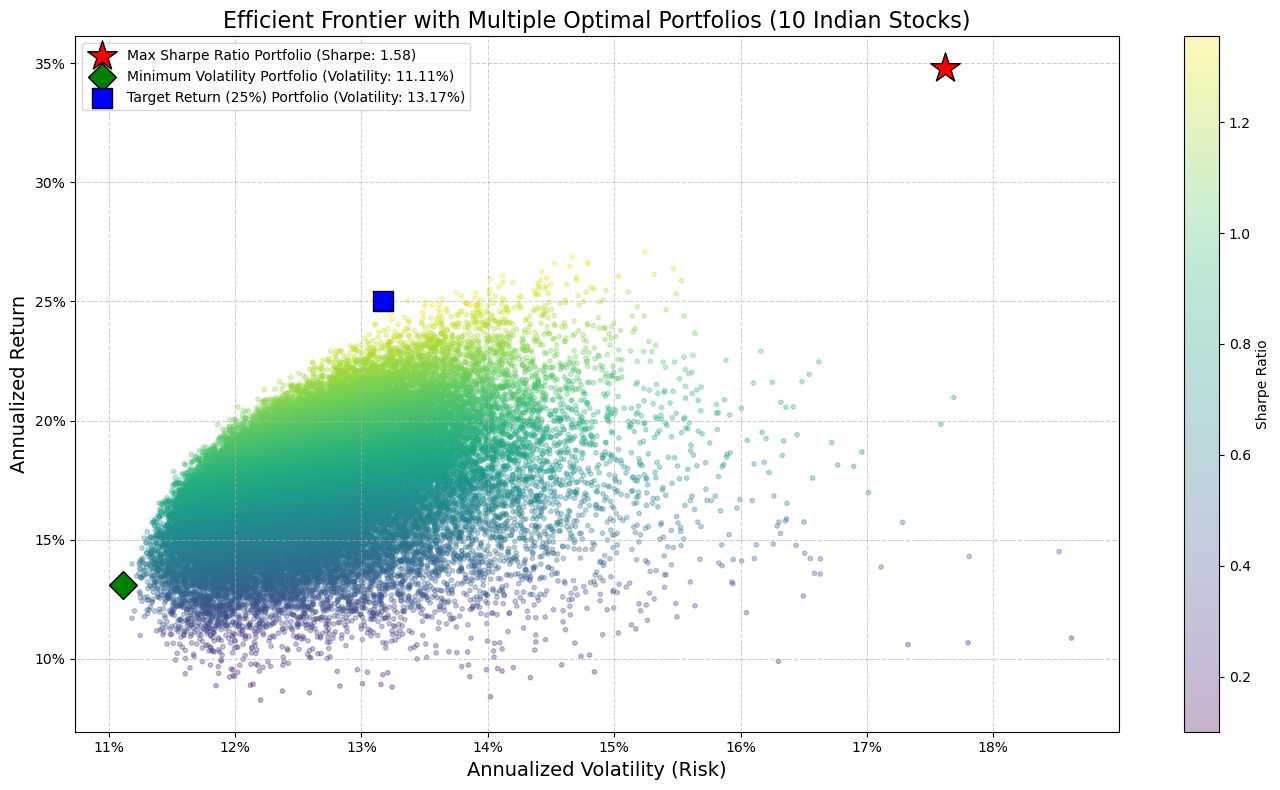

In [75]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import os

# --- Re-load Cleaned Data and Pre-calculated Statistics from previous steps ---
# (Assuming 'cleaned_indian_stocks.csv' exists from your previous run)


prices = df
returns = prices.pct_change().dropna()

TRADING_DAYS_PER_YEAR = 252
mean_returns = returns.mean() * TRADING_DAYS_PER_YEAR
cov_matrix = returns.cov() * TRADING_DAYS_PER_YEAR
num_assets = len(prices.columns)
stock_names = prices.columns.tolist()
RISK_FREE_RATE = 0.07

# --- Re-define the Portfolio Statistics Function ---
# This function is essential for all portfolio calculations

def get_portfolio_stats(weights, mean_returns, cov_matrix, risk_free_rate):
    """Calculates the portfolio's expected return, volatility, and Sharpe ratio."""
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio

# --- Define Optimization Functions for Different Objectives ---

def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    """Objective function to minimize for Max Sharpe Ratio."""
    return -get_portfolio_stats(weights, mean_returns, cov_matrix, risk_free_rate)[2]

def portfolio_volatility(weights, mean_returns, cov_matrix, risk_free_rate):
    """Objective function to minimize for Minimum Volatility."""
    # We only need the second value from get_portfolio_stats (the volatility)
    return get_portfolio_stats(weights, mean_returns, cov_matrix, risk_free_rate)[1]

# --- Common Optimization Parameters ---

# Constraint: All weights must sum to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds: Each weight must be between 0 and 1 (no short-selling)
bounds = tuple((0, 1) for _ in range(num_assets))

# Initial Guess: Equal allocation
initial_weights = np.array([1 / num_assets] * num_assets)

print("--- Starting Portfolio Optimizations ---")

# --- 1. Find the Maximum Sharpe Ratio Portfolio (Reconfirming previous result) ---

print("\nOptimizing for Maximum Sharpe Ratio...")
opt_sharpe_result = minimize(
    negative_sharpe_ratio,
    initial_weights,
    args=(mean_returns, cov_matrix, RISK_FREE_RATE),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

if opt_sharpe_result.success:
    max_sharpe_weights = opt_sharpe_result.x
    max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio_val = get_portfolio_stats(
        max_sharpe_weights, mean_returns, cov_matrix, RISK_FREE_RATE
    )
    print(f"  Max Sharpe Ratio: {max_sharpe_ratio_val:.4f}")
    print(f"  Return: {max_sharpe_return*100:.2f}%, Volatility: {max_sharpe_volatility*100:.2f}%")
else:
    print("  Max Sharpe Ratio optimization failed.")

# --- 2. Find the Minimum Volatility Portfolio ---

print("\nOptimizing for Minimum Volatility...")
opt_min_vol_result = minimize(
    portfolio_volatility, # Objective function changed here
    initial_weights,
    args=(mean_returns, cov_matrix, RISK_FREE_RATE), # Note: Risk-free rate is technically not needed for volatility itself
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

if opt_min_vol_result.success:
    min_vol_weights = opt_min_vol_result.x
    min_vol_return, min_vol_volatility, _ = get_portfolio_stats( # Sharpe not needed for objective
        min_vol_weights, mean_returns, cov_matrix, RISK_FREE_RATE
    )
    print(f"  Min Volatility: {min_vol_volatility*100:.2f}%")
    print(f"  Return: {min_vol_return*100:.2f}%")
else:
    print("  Min Volatility optimization failed.")


# --- 3. Find a Target Return Portfolio (e.g., Target Annual Return of 25%) ---

TARGET_RETURN = 0.25 # Set your desired target annual return here (e.g., 25%)

print(f"\nOptimizing for Minimum Volatility at Target Return of {TARGET_RETURN*100:.0f}%...")

# Add an additional constraint: Portfolio Return must equal TARGET_RETURN
target_return_constraint = ({'type': 'eq', 'fun': lambda weights: get_portfolio_stats(weights, mean_returns, cov_matrix, RISK_FREE_RATE)[0] - TARGET_RETURN})

# Combine existing constraints with the new target return constraint
all_constraints_target_return = [constraints, target_return_constraint]

opt_target_return_result = minimize(
    portfolio_volatility, # Still minimizing volatility
    initial_weights,
    args=(mean_returns, cov_matrix, RISK_FREE_RATE),
    method='SLSQP',
    bounds=bounds,
    constraints=all_constraints_target_return # Use combined constraints
)

if opt_target_return_result.success:
    target_return_weights = opt_target_return_result.x
    target_return_return, target_return_volatility, target_return_sharpe = get_portfolio_stats(
        target_return_weights, mean_returns, cov_matrix, RISK_FREE_RATE
    )
    print(f"  Target Return: {target_return_return*100:.2f}%")
    print(f"  Volatility: {target_return_volatility*100:.2f}%")
    print(f"  Sharpe Ratio: {target_return_sharpe:.4f}")
else:
    print(f"  Target Return ({TARGET_RETURN*100:.0f}%) optimization failed.")
    print(f"  Message: {opt_target_return_result.message}")
    print("  This can happen if the target return is unachievable given the assets.")

# --- Monte Carlo Simulation for Visualization (Re-run for context) ---

num_portfolios = 50000
all_portfolio_returns = np.zeros(num_portfolios)
all_portfolio_volatilities = np.zeros(num_portfolios)
all_portfolio_sharpes = np.zeros(num_portfolios)

print(f"\nRunning Monte Carlo simulation for {num_portfolios} random portfolios for plotting...")
for i in range(num_portfolios):
    rand_weights = np.random.rand(num_assets)
    rand_weights = rand_weights / np.sum(rand_weights)
    port_ret, port_vol, port_sharpe = get_portfolio_stats(rand_weights, mean_returns, cov_matrix, RISK_FREE_RATE)
    all_portfolio_returns[i] = port_ret
    all_portfolio_volatilities[i] = port_vol
    all_portfolio_sharpes[i] = port_sharpe

print("Simulation complete. Generating plot...")

# --- Plotting All Optimal Portfolios ---

plt.figure(figsize=(14, 8))

# Scatter plot of all random portfolios
scatter = plt.scatter(
    all_portfolio_volatilities,
    all_portfolio_returns,
    c=all_portfolio_sharpes,
    cmap='viridis',
    marker='o',
    alpha=0.3,
    s=10
)
plt.colorbar(scatter, label='Sharpe Ratio')

# Plot the Maximum Sharpe Ratio Portfolio (Red Star)
plt.scatter(
    max_sharpe_volatility,
    max_sharpe_return,
    marker='*',
    color='red',
    s=500,
    label=f'Max Sharpe Ratio Portfolio (Sharpe: {max_sharpe_ratio_val:.2f})',
    edgecolors='black',
    zorder=3
)

# Plot the Minimum Volatility Portfolio (Green Diamond)
plt.scatter(
    min_vol_volatility,
    min_vol_return,
    marker='D', # Diamond marker
    color='green',
    s=200,
    label=f'Minimum Volatility Portfolio (Volatility: {min_vol_volatility*100:.2f}%)',
    edgecolors='black',
    zorder=3
)

# Plot the Target Return Portfolio (Blue Square)
if opt_target_return_result.success:
    plt.scatter(
        target_return_volatility,
        target_return_return,
        marker='s', # Square marker
        color='blue',
        s=200,
        label=f'Target Return ({TARGET_RETURN*100:.0f}%) Portfolio (Volatility: {target_return_volatility*100:.2f}%)',
        edgecolors='black',
        zorder=3
    )

plt.title(f'Efficient Frontier with Multiple Optimal Portfolios ({num_assets} Indian Stocks)', fontsize=16)
plt.xlabel('Annualized Volatility (Risk)', fontsize=14)
plt.ylabel('Annualized Return', fontsize=14)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x*100:.0f}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: f'{y*100:.0f}%'))
plt.legend(loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot
plot_filename_multi_opt = 'efficient_frontier_multi_optimal_portfolios.png'
plt.savefig(plot_filename_multi_opt)
print(f"Plot with multiple optimal portfolios saved as '{plot_filename_multi_opt}'")
plt.show()

--- Starting Portfolio Optimizations ---

Optimizing for Maximum Sharpe Ratio...
  Max Sharpe Ratio: 1.5776
  Return: 34.79%, Volatility: 17.62%

Optimizing for Minimum Volatility...
  Min Volatility: 11.11%
  Return: 13.11%

Optimizing for Minimum Volatility at Target Return of 25%...
  Target Return: 25.00%
  Volatility: 13.17%
  Sharpe Ratio: 1.3667


--- PORTFOLIO ALLOCATION PERCENTAGES ---

[1] Max Sharpe Ratio Portfolio:
  airtel: 41.75%
  mahindra and mahindra: 35.25%
  L&T: 21.10%
  icici: 1.91%
  infosys: 0.00%
  hindunilever: 0.00%
  tcs: 0.00%
  reliance: 0.00%
  asian paints: 0.00%
  hdfc bannk: 0.00%
  (Total: 100.00%)

[2] Minimum Volatility Portfolio:
  hindunilever: 20.00%
  infosys: 16.71%
  airtel: 13.01%
  reliance: 11.49%
  hdfc bannk: 11.45%
  asian paints: 9.45%
  tcs: 6.39%
  L&T: 4.55%
  icici: 4.05%
  mahindra and mahindra: 2.89%
  (Total: 100.00%)

[3] Target Return (25%) Portfolio:
  airtel: 27.77%
  mahindra and mahindra: 18.60%
  L&T: 14.40%
  infosys: 11.8

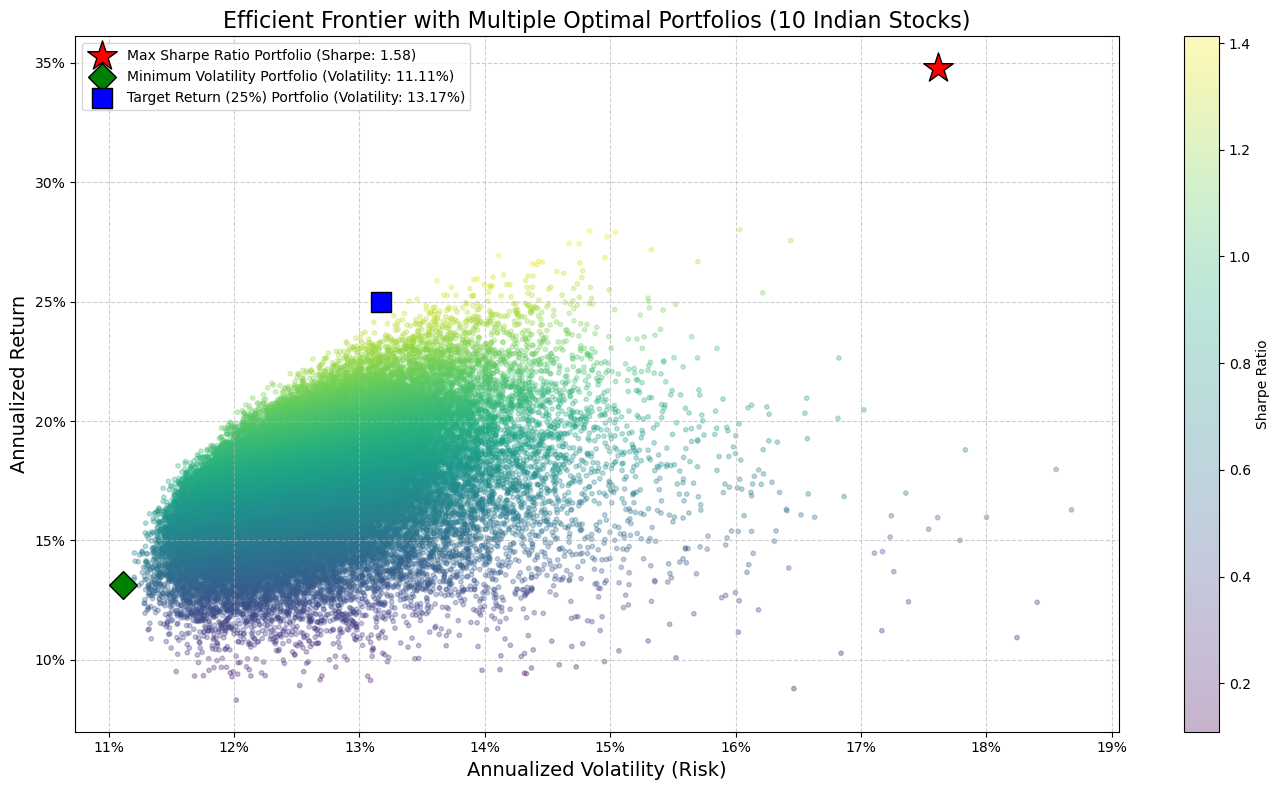

In [58]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import os

# --- Re-load Cleaned Data and Pre-calculated Statistics from previous steps ---

returns = prices.pct_change().dropna()

TRADING_DAYS_PER_YEAR = 252
mean_returns = returns.mean() * TRADING_DAYS_PER_YEAR
cov_matrix = returns.cov() * TRADING_DAYS_PER_YEAR
num_assets = len(prices.columns)
stock_names = prices.columns.tolist()
RISK_FREE_RATE = 0.07

# --- Re-define the Portfolio Statistics Function ---
def get_portfolio_stats(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio

# --- Define Optimization Functions for Different Objectives ---
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    return -get_portfolio_stats(weights, mean_returns, cov_matrix, risk_free_rate)[2]

def portfolio_volatility_obj(weights, mean_returns, cov_matrix, risk_free_rate): # Renamed to avoid conflict
    return get_portfolio_stats(weights, mean_returns, cov_matrix, risk_free_rate)[1]

# --- Common Optimization Parameters ---
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
bounds = tuple((0, 1) for _ in range(num_assets))
initial_weights = np.array([1 / num_assets] * num_assets)

print("--- Starting Portfolio Optimizations ---")

# --- 1. Find the Maximum Sharpe Ratio Portfolio ---
print("\nOptimizing for Maximum Sharpe Ratio...")
opt_sharpe_result = minimize(
    negative_sharpe_ratio,
    initial_weights,
    args=(mean_returns, cov_matrix, RISK_FREE_RATE),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

max_sharpe_weights = None # Initialize to handle optimization failures
if opt_sharpe_result.success:
    max_sharpe_weights = opt_sharpe_result.x
    max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio_val = get_portfolio_stats(
        max_sharpe_weights, mean_returns, cov_matrix, RISK_FREE_RATE
    )
    print(f"  Max Sharpe Ratio: {max_sharpe_ratio_val:.4f}")
    print(f"  Return: {max_sharpe_return*100:.2f}%, Volatility: {max_sharpe_volatility*100:.2f}%")
else:
    print("  Max Sharpe Ratio optimization failed.")


# --- 2. Find the Minimum Volatility Portfolio ---
print("\nOptimizing for Minimum Volatility...")
opt_min_vol_result = minimize(
    portfolio_volatility_obj,
    initial_weights,
    args=(mean_returns, cov_matrix, RISK_FREE_RATE),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

min_vol_weights = None # Initialize
if opt_min_vol_result.success:
    min_vol_weights = opt_min_vol_result.x
    min_vol_return, min_vol_volatility, _ = get_portfolio_stats(
        min_vol_weights, mean_returns, cov_matrix, RISK_FREE_RATE
    )
    print(f"  Min Volatility: {min_vol_volatility*100:.2f}%")
    print(f"  Return: {min_vol_return*100:.2f}%")
else:
    print("  Min Volatility optimization failed.")


# --- 3. Find a Target Return Portfolio (e.g., Target Annual Return of 25%) ---
TARGET_RETURN = 0.25 # Set your desired target annual return here (e.g., 25%)
print(f"\nOptimizing for Minimum Volatility at Target Return of {TARGET_RETURN*100:.0f}%...")

target_return_constraint = ({'type': 'eq', 'fun': lambda weights: get_portfolio_stats(weights, mean_returns, cov_matrix, RISK_FREE_RATE)[0] - TARGET_RETURN})
all_constraints_target_return = [constraints, target_return_constraint]

opt_target_return_result = minimize(
    portfolio_volatility_obj,
    initial_weights,
    args=(mean_returns, cov_matrix, RISK_FREE_RATE),
    method='SLSQP',
    bounds=bounds,
    constraints=all_constraints_target_return
)

target_return_weights = None # Initialize
if opt_target_return_result.success:
    target_return_weights = opt_target_return_result.x
    target_return_return, target_return_volatility, target_return_sharpe = get_portfolio_stats(
        target_return_weights, mean_returns, cov_matrix, RISK_FREE_RATE
    )
    print(f"  Target Return: {target_return_return*100:.2f}%")
    print(f"  Volatility: {target_return_volatility*100:.2f}%")
    print(f"  Sharpe Ratio: {target_return_sharpe:.4f}")
else:
    print(f"  Target Return ({TARGET_RETURN*100:.0f}%) optimization failed.")
    print(f"  Message: {opt_target_return_result.message}")


# --- Display Portfolio Percentages (ALLOCATION BREAKDOWN) ---

print("\n\n--- PORTFOLIO ALLOCATION PERCENTAGES ---")

if max_sharpe_weights is not None:
    print("\n[1] Max Sharpe Ratio Portfolio:")
    sorted_weights = sorted(zip(stock_names, max_sharpe_weights), key=lambda x: x[1], reverse=True)
    for stock, weight in sorted_weights:
        print(f"  {stock}: {weight * 100:.2f}%")
    print(f"  (Total: {np.sum(max_sharpe_weights) * 100:.2f}%)")

if min_vol_weights is not None:
    print("\n[2] Minimum Volatility Portfolio:")
    sorted_weights = sorted(zip(stock_names, min_vol_weights), key=lambda x: x[1], reverse=True)
    for stock, weight in sorted_weights:
        print(f"  {stock}: {weight * 100:.2f}%")
    print(f"  (Total: {np.sum(min_vol_weights) * 100:.2f}%)")

if target_return_weights is not None:
    print(f"\n[3] Target Return ({TARGET_RETURN*100:.0f}%) Portfolio:")
    sorted_weights = sorted(zip(stock_names, target_return_weights), key=lambda x: x[1], reverse=True)
    for stock, weight in sorted_weights:
        print(f"  {stock}: {weight * 100:.2f}%")
    print(f"  (Total: {np.sum(target_return_weights) * 100:.2f}%)")


# --- Monte Carlo Simulation for Visualization ---

num_portfolios = 50000
all_portfolio_returns = np.zeros(num_portfolios)
all_portfolio_volatilities = np.zeros(num_portfolios)
all_portfolio_sharpes = np.zeros(num_portfolios)

print(f"\nRunning Monte Carlo simulation for {num_portfolios} random portfolios for plotting...")
for i in range(num_portfolios):
    rand_weights = np.random.rand(num_assets)
    rand_weights = rand_weights / np.sum(rand_weights)
    port_ret, port_vol, port_sharpe = get_portfolio_stats(rand_weights, mean_returns, cov_matrix, RISK_FREE_RATE)
    all_portfolio_returns[i] = port_ret
    all_portfolio_volatilities[i] = port_vol
    all_portfolio_sharpes[i] = port_sharpe

print("Simulation complete. Generating plot...")

# --- Plotting All Optimal Portfolios ---

plt.figure(figsize=(14, 8))

scatter = plt.scatter(
    all_portfolio_volatilities,
    all_portfolio_returns,
    c=all_portfolio_sharpes,
    cmap='viridis',
    marker='o',
    alpha=0.3,
    s=10
)
plt.colorbar(scatter, label='Sharpe Ratio')

if max_sharpe_weights is not None:
    plt.scatter(
        max_sharpe_volatility,
        max_sharpe_return,
        marker='*',
        color='red',
        s=500,
        label=f'Max Sharpe Ratio Portfolio (Sharpe: {max_sharpe_ratio_val:.2f})',
        edgecolors='black',
        zorder=3
    )

if min_vol_weights is not None:
    plt.scatter(
        min_vol_volatility,
        min_vol_return,
        marker='D',
        color='green',
        s=200,
        label=f'Minimum Volatility Portfolio (Volatility: {min_vol_volatility*100:.2f}%)',
        edgecolors='black',
        zorder=3
    )

if target_return_weights is not None:
    plt.scatter(
        target_return_volatility,
        target_return_return,
        marker='s',
        color='blue',
        s=200,
        label=f'Target Return ({TARGET_RETURN*100:.0f}%) Portfolio (Volatility: {target_return_volatility*100:.2f}%)',
        edgecolors='black',
        zorder=3
    )

plt.title(f'Efficient Frontier with Multiple Optimal Portfolios ({num_assets} Indian Stocks)', fontsize=16)
plt.xlabel('Annualized Volatility (Risk)', fontsize=14)
plt.ylabel('Annualized Return', fontsize=14)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x*100:.0f}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: f'{y*100:.0f}%'))
plt.legend(loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plot_filename_multi_opt = 'efficient_frontier_multi_optimal_portfolios.png'
plt.savefig(plot_filename_multi_opt)
print(f"Plot with multiple optimal portfolios saved as '{plot_filename_multi_opt}'")
plt.show()

In [59]:
import pandas as pd

# --- Create a DataFrame to Display Asset Allocation for All Three Portfolios ---

print("\n--- Comparative Asset Allocation Matrix ---")

# 1. Create a dictionary where keys are column names and values are the weight arrays
# We multiply by 100 to show them as percentages
allocation_data = {
    'Stock Name': stock_names,
    'Max Sharpe Wgt (%)': np.round(max_sharpe_weights * 100, 2),
    'Min Volatility Wgt (%)': np.round(min_vol_weights * 100, 2),
}

# 2. Add the Target Return weights only if that optimization was successful
if opt_target_return_result.success:
    allocation_data[f'Target {TARGET_RETURN*100:.0f}% Return Wgt (%)'] = np.round(target_return_weights * 100, 2)
else:
    print(f"Note: Target Return portfolio weights not included because optimization failed.")

# 3. Create the DataFrame
allocation_df = pd.DataFrame(allocation_data)

# 4. Set 'Stock Name' as the index for a cleaner look
allocation_df = allocation_df.set_index('Stock Name')

# 5. Sort the DataFrame to make it easier to read.
# Let's sort by the 'Max Sharpe Wgt (%)' in descending order to see the top holdings first.
allocation_df = allocation_df.sort_values(by='Max Sharpe Wgt (%)', ascending=False)

# 6. Display the final matrix/table
print(allocation_df)

# Optional: Save this table to a CSV file for your report
# allocation_df.to_csv('portfolio_allocation_matrix.csv')
# print("\nAllocation matrix saved to 'portfolio_allocation_matrix.csv'")


--- Comparative Asset Allocation Matrix ---
                       Max Sharpe Wgt (%)  Min Volatility Wgt (%)  \
Stock Name                                                          
airtel                              41.75                   13.01   
mahindra and mahindra               35.25                    2.89   
L&T                                 21.10                    4.55   
icici                                1.91                    4.05   
reliance                             0.00                   11.49   
hdfc bannk                           0.00                   11.45   
infosys                              0.00                   16.71   
tcs                                  0.00                    6.39   
hindunilever                         0.00                   20.00   
asian paints                         0.00                    9.45   

                       Target 25% Return Wgt (%)  
Stock Name                                        
airtel                  